In [1]:
import math
import matplotlib.pyplot as plt
import sklearn.datasets
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap

In [2]:
mnist = sklearn.datasets.load_digits()

In [3]:
print(type(mnist.data))
print(mnist.data.shape)
print(mnist.target)
print(mnist.DESCR)

<class 'numpy.ndarray'>
(1797, 64)
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x

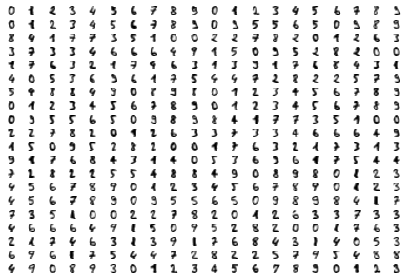

In [4]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(mnist.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

(1797, 2)


Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

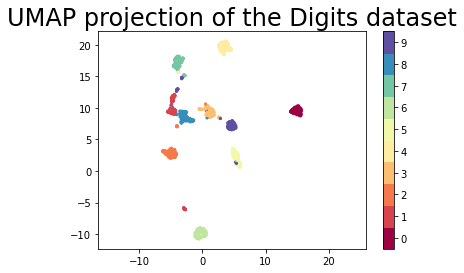

In [5]:
model = umap.UMAP()
model.fit_transform(mnist.data)
embedding = model.transform(mnist.data)
print(embedding.shape)

plt.scatter(embedding[:, 0], embedding[:, 1], c=mnist.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24)

(1797, 2)


Text(0.5, 1.0, 'PCA projection of the Digits dataset')

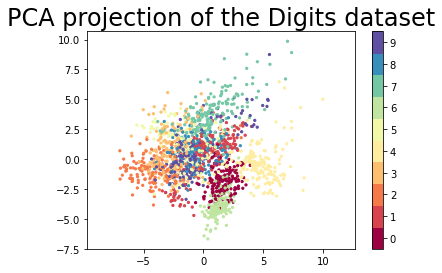

In [6]:
# Standardise the data
scaler = StandardScaler()
X_std = scaler.fit_transform(mnist.data)
#print(np.linalg.eig(np.matmul(X_std.T, X_std)))
# Apply PCA with 2 components
pca = PCA(n_components=2)
embedding = pca.fit_transform(X_std)
print(embedding.shape)

plt.scatter(embedding[:, 0], embedding[:, 1], c=mnist.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('PCA projection of the Digits dataset', fontsize=24)